# Word Embeddings

### Word embeddings are a modern approach for representing text in natural language processing.

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

## Word2Vec

#### Word2Vec is a statistical method for efficiently learning a standalone word embedding from a text corpus.

word2vec has two main approach which are:
- Continuous Bag-of-Words, or CBOW model.
- Continuous Skip-Gram Model.

The CBOW model learns the embedding by predicting the current word based on its context. The continuous skip-gram model learns by predicting the surrounding words given a current word.
<img src="../images/Word2Vec-Training-Models.png" alt="Word2Vec-Training-Models" width="600" height="600">


In [1]:
# Arabic plot words handle

from __future__ import unicode_literals
import arabic_reshaper
from bidi.algorithm import get_display

import os
import sys
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot





# splitting data
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Features Extraction word2vec
from gensim.models import Word2Vec

# Dimension reduction
from sklearn.decomposition import PCA


### import cleaning data file because of using some of its function of we need

In [2]:
sys.path.append(os.path.abspath('../scraping_cleaning'))
from cleaning_data import *

Our scraped now are 5777 Product
one product Data

 {'_id': ObjectId('5e48539b980cc3c34837af7f'), 'product_title': 'هاتف ابل ايفون 11 مع فيس تايم بشريحة واحدة وشريحة الكترونية - ذاكرة تخزين 64 جيجا، ذاكرة وصول عشوائية 4 جيجا، شبكة ال تي اي من الجيل الرابع - ارجواني', 'product_url': 'https://egypt.souq.com/eg-ar/%D9%87%D8%A7%D8%AA%D9%81-%D8%A7%D8%A8%D9%84-%D8%A7%D9%8A%D9%81%D9%88%D9%86-11-%D9%85%D8%B9-%D9%81%D9%8A%D8%B3-%D8%AA%D8%A7%D9%8A%D9%85-%D8%A8%D8%B4%D8%B1%D9%8A%D8%AD%D8%A9-%D9%88%D8%A7%D8%AD%D8%AF%D8%A9-%D9%88%D8%B4%D8%B1%D9%8A%D8%AD%D8%A9-%D8%A7%D9%84%D9%83%D8%AA%D8%B1%D9%88%D9%86%D9%8A%D8%A9-%D8%B0%D8%A7%D9%83%D8%B1%D8%A9-%D8%AA%D8%AE%D8%B2%D9%8A%D9%86-64-%D8%AC%D9%8A%D8%AC%D8%A7-%D8%B0%D8%A7%D9%83%D8%B1%D8%A9-%D9%88%D8%B5%D9%88%D9%84-%D8%B9%D8%B4%D9%88%D8%A7%D8%A6%D9%8A%D8%A9-4-%D8%AC%D9%8A%D8%AC%D8%A7-%D8%B4%D8%A8%D9%83%D8%A9-%D8%A7%D9%84-%D8%AA%D9%8A-%D8%A7%D9%8A-%D9%85%D9%86-%D8%A7%D9%84%D8%AC%D9%8A%D9%84-%D8%A7%D9%84%D8%B1%D8%A7%D8%A8%D8%B9-%D8%A7%D8%B1%D8%AC%D9%88%D8%A7%

## Read our classified file

In [3]:
df = pd.read_csv('../csv_files/file_classified_reviews_updated.csv')
df = df.astype(str)
df.head()


,Arabic Reviews,polarity
0,ممتاز صراح مريح خاصت في خرج لي من غير عرب,1
1,عمل,1
2,جيد وع,0
3,حل,1
4,سرير او محجر كما سمي ممتاز وم عب امان خاص اطفا...,1


In [4]:
print("The number of reviews in our data set is: ", len(df))

The number of reviews in our data set is:  6057


**Shuffle the data**

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
X_train = df.loc[:5000,'Arabic Reviews'].values
y_train = df.loc[:5000,'polarity'].values
X_test = df.loc[5001:,'Arabic Reviews'].values
y_test = df.loc[5001:,'polarity'].values

In [7]:
text_list = df.loc[:,'Arabic Reviews'].values

In [8]:
text_list = list(text_list)

### get The maximum length of greatest string of our reviews

In [9]:
max_len_str = max([len(i.split()) for i in text_list])

print("The greatest string of our reviews: ", max_len_str)

The greatest string of our reviews:  206


In [10]:
text_list = [i.split() for i in text_list] # split each review to list of words
print("The firt 5 reviews are: ", text_list[:5])

The firt 5 reviews are:  [['جراب', 'راءع', 'شكل', 'مميز', 'لكن', 'زيد', 'من', 'سمك', 'كل', 'وزن', 'كل', 'موبايل'], ['منتج', 'جيد', 'سعر', 'مناسب', 'جد', 'مطابق', 'مواصف', 'حسب', 'اعل', 'زم', 'تسليم', 'قياس'], ['ول', 'تجاوب', 'سرعه', 'في', 'عمل', 'شراء'], ['جهاز', 'تجرب', 'على', 'حال', 'مرض', 'سكر', 'عا', 'من', 'ام', 'قدم', 'كان', 'مناسب', 'خفيف', 'الم', 'ستخدم', 'طريقه', 'صحيحه', 'ضا', 'من', 'لدى', 'الم', 'سبب', 'تشقق', 'قدم', 'لا', 'عالج', 'تشقق', 'نم', 'خفف', 'الم', 'ناتج', 'عن', 'تلك', 'تشقق', 'اثناء', 'سير', 'او', 'عمل', 'منزل'], ['ايجاب', 'سلب', 'مساح', 'بخار', 'تش', 'تو', 'او', '5']]


###  our word 2 vec 
- size = extract 50 features for each word
- window = 7 take the context of neighbour words
- min_count = 1 consider each word that even repeated 1 time

In [11]:
number_of_features = 50
window_size = 7
min_words_count = 1

In [19]:
def word_to_vec(text_list, number_of_features, window_size, min_words_count):
    '''
    Argument:
        list of strings and each string is list of words
        size = extract 50 features for each word
        window = 7 take the context of neighbour words
        min_count = 1 consider each word that even repeated 1 time
    return:
        the word2vec model
    '''
    word_to_vec_model = Word2Vec(text_list, size =number_of_features, window = window_size, min_count=min_words_count, sg = 1) 
    print("Our word2vec model: ", word_to_vec_model)
    print("The number of frequent words of our data: ", len(word_to_vec_model.wv.vocab)) # the frequent words
    # save model
    word_to_vec_model.save('models_saved/word_to_vec_model.bin')

    # load model
    word_to_vec_model = Word2Vec.load('models_saved/word_to_vec_model.bin')
    return word_to_vec_model

In [20]:
word_to_vec_model = word_to_vec(text_list, number_of_features, window_size, min_words_count)

Our word2vec model:  Word2Vec(vocab=5487, size=50, alpha=0.025)
The number of frequent words of our data:  5487


In [21]:
print("Feature of some words\n", word_to_vec_model['ممتاز'])

Feature of some words
 [-0.02766156 -0.6760112  -0.48738003 -0.17621489  0.40082735  0.02653749
 -0.32580742 -0.54336095  0.6088528  -0.08125173  0.38140836 -0.18944035
  0.1610975   0.11766335 -0.097762   -0.04459966 -0.46242872 -0.3906263
  0.6099228  -0.65180224  0.15633187  0.5074659  -0.52477944 -0.17418385
  0.51674265  0.01460779  0.02042623 -0.4664853   0.03495372  0.14726606
  0.7373101   0.38452327  0.12166482  0.03323374  0.02718482 -0.08137503
  0.01558152  0.29796362  0.3718161   0.11773174  0.08418586 -0.1802989
  0.05822263 -0.15554442 -0.2921819   0.14238237  0.35549334  0.01166103
  0.29896787 -0.52994025]


/home/abdelrahman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### display the data using  PCA

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


The shape of our word_features is: (100, 50)


/home/abdelrahman/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/abdelrahman/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


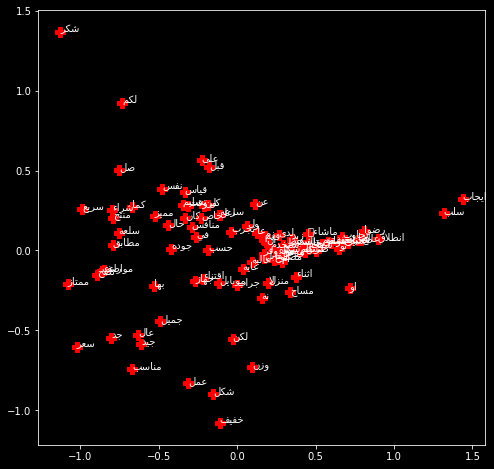

In [22]:
 # retrieve frequent words
words = list(word_to_vec_model.wv.vocab)

# I took just 100 words to present with PCA
words = words[:100]

# get the features of those 100 word
word_features = word_to_vec_model[words] 

# it will be 100 word * 50 which 50 feature of each word
print("The shape of our word_features is:", word_features.shape)

# Dimension reduction to display so instead of 50 dimension of each word 
#reduce to 2 dimensional that have fine display
# from 50 features to just 2 features for displaying how words related words to gether
pca = PCA(n_components=2)

# fit the model
xy_words = pca.fit_transform(word_features)

# set the visualization plot
plt.style.use(['dark_background'])
plt.figure(figsize=(8,8))

# after reduction for all features in first column as x and all features from second column as y
plt.scatter(xy_words[:, 0], xy_words[:, 1], marker='P',s=100, c="red") 

for i, word in enumerate(words):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(xy_words[i, 0], xy_words[i, 1]))
plt.show()

### handle the padding and fill small string with zeros

- intilize zero matrix with
- shape with all of reviews as n rows and columns of number_of_features you make * with largest string length of you data
- for each review:
    - retrieve the features of the words it contain
    - initialize zeros as padding for small strings
    - apply the padding for small strings 
    - append to embedding_matrix

In [26]:
def word_2_vec_matrix(text_list,word_to_vec_model,number_of_features, max_len_str):
    '''
    Argument:
            List of string each of them is list of words
            the word_to_vec_model model
            number of features you apply to word2vec model
            number of words of greatest string in your reviews
    return:
        embedding matrix that can apply to machine learning algorithms
    '''
    embedding_matrix = np.zeros((len(text_list), number_of_features*max_len_str)) # largest sentence and 5 fetures
    print("The shape of matrix", embedding_matrix.shape)
#loop over each review
    for index,review in enumerate(text_list):
# list of each reviw which will be appended to embedding matrix
        one_sentence_list = [] 
        for word in review:
            word = word_to_vec_model[word]
            one_sentence_list.extend(word)
            
# make padding for small strings
        zero_pad = np.zeros(number_of_features*max_len_str-len(one_sentence_list))
        zero_pad = list(zero_pad)
    
# apply the padding
        one_sentence_list.extend(zero_pad)
        embedding_matrix[index] = one_sentence_list
    return embedding_matrix

In [27]:
embedding_matrix = word_2_vec_matrix(text_list,word_to_vec_model, number_of_features, max_len_str)

The shape of matrix (6057, 10300)


/home/abdelrahman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [28]:
y = df['polarity'] # labels of our dataset

## split the data to train and testing 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(embedding_matrix, y, test_size=.1)

In [30]:
X_train.shape

(5451, 10300)

In [50]:
clf_LogisticRegression = LogisticRegression(penalty='l2', tol=0.00001, solver='liblinear',max_iter=1000)

In [51]:
logistic_model = clf_LogisticRegression.fit(X_train, y_train)

In [52]:
predict = logistic_model.predict(X_train)

In [53]:
print("F1 score of our testing data is: ", f1_score(y_train, predict, average='micro'))

F1 score of our testing data is:  0.8481012658227848


In [54]:
print("Evalution Matrix of training data is \n", confusion_matrix(y_train, predict))

Evalution Matrix of training data is 
 [[ 331  715]
 [ 113 4292]]


In [55]:
predict = logistic_model.predict(X_test)

In [56]:
print("F1 score of our testing data is: ", f1_score(y_test, predict, average='micro'))

F1 score of our testing data is:  0.8366336633663366


In [57]:
print("Evalution Matrix of testing data is \n", confusion_matrix(y_test, predict))

Evalution Matrix of testing data is 
 [[ 23  85]
 [ 14 484]]


In [62]:
clf_SVC = SVC(kernel='linear')

In [63]:
svc_model = clf_SVC.fit(X_train, y_train)

In [64]:
predict = svc_model.predict(X_train)

In [65]:
print("F1 score of our traing data is: ", f1_score(y_train, predict, average='micro'))

F1 score of our testing data is:  0.8488350761328197


In [66]:
print("Evalution Matrix of training data is \n", confusion_matrix(y_train, predict))

Evalution Matrix of training data is 
 [[ 263  783]
 [  41 4364]]


In [67]:
predict = svc_model.predict(X_test)

In [68]:
print("F1 score of our testing data is: ", f1_score(y_test, predict, average='micro'))

F1 score of our testing data is:  0.8316831683168316


In [69]:
print("Evalution Matrix of testing data is \n", confusion_matrix(y_test, predict))

Evalution Matrix of testing data is 
 [[ 21  87]
 [ 15 483]]
